# Univariate Linear Regression on California Housing Prices

## Framing the Problem

In this report, we aim to explore the relationship between the median house value and three independent variables:
- Median Income
- Population
- Number of Households

## Getting the Data from the dataset ()

We are using the [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices) for this analysis. The dataset can be downloaded from [this link](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Below, we load the dataset into a Pandas DataFrame.


In [18]:
# Import necessary libraries
import pandas as pd

# Load the dataset into a Pandas DataFrame
housing = pd.read_csv("C:/Users/imraj/Desktop/conestoga/CSCN8010/datasets/housing.csv")

# Show the first few rows of the dataset
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Summary of Dataset

The [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices) consists of 20,640 records and 10 columns in total. The given dataset is used for the prediction of median house values across different districts of California, keeping in view the feature variables like location, population, and household income. 

Total Entries: 20,640 rows.
Data Types: The data includes primarily numerical features, while the feature ocean_proximity is categorical.
Missing Values: total_bedrooms contains missing values, less than 1% of entries altogether can be completed using techniques like median imputation.
Target Variable: The key target variable in this dataset is median_house_value. It ranges from $14,999 up to $500,001. The high value of $500,001 is an upper limit and may be capping the data.

## Exploratory Data Analysis (EDA)

### Descriptive Statistics
The table below provides a summary of the dataset, including key statistics like mean, median, and standard deviation for each feature.


In [19]:
# Descriptive statistics for the dataset
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
# Get the minimum and maximum values of the 'median_house_value' column
min_value = housing['median_house_value'].min()
max_value = housing['median_house_value'].max()

print(f"The median house value ranges from ${min_value} to ${max_value}.")

The median house value ranges from $14999.0 to $500001.0.


### Scatter Plots

Below are three scatter plots illustrating the relationships between the median house value and the independent variables: median income, population, and number of households. Observing the data visually helps us understand potential correlations. 

Used the references from  [Statology](https://www.statology.org/seaborn-subplots/)


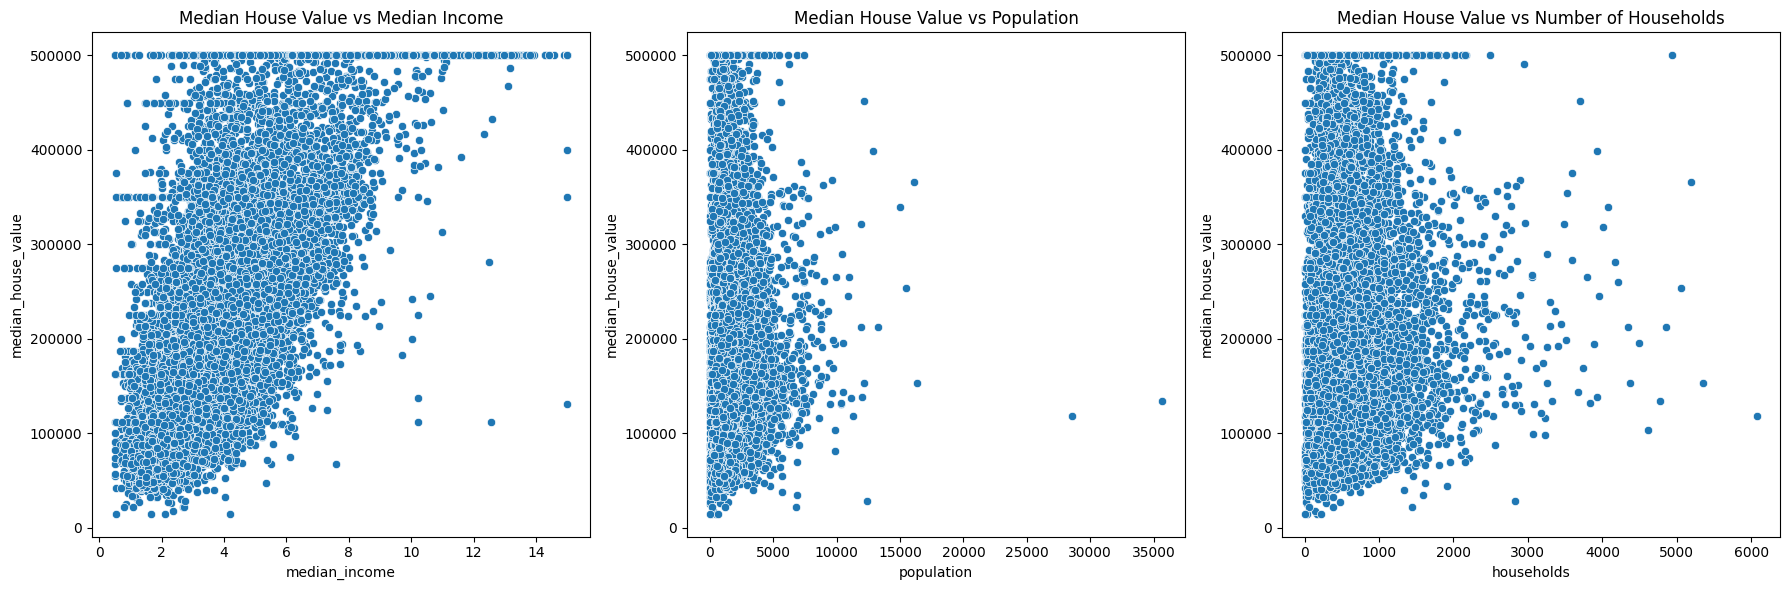

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the plots for better visualization
plt.figure(figsize=(18, 6))

# Scatter plot for median house value vs median income
plt.subplot(1, 3, 1)
sns.scatterplot(x='median_income', y='median_house_value', data=housing)
plt.title('Median House Value vs Median Income')

# Scatter plot for median house value vs population
plt.subplot(1, 3, 2)
sns.scatterplot(x='population', y='median_house_value', data=housing)
plt.title('Median House Value vs Population')

# Scatter plot for median house value vs number of households
plt.subplot(1, 3, 3)
sns.scatterplot(x='households', y='median_house_value', data=housing)
plt.title('Median House Value vs Number of Households')

plt.tight_layout()
plt.show()


### Description of Variables

1. **Median Income**: It represents the median income of households between the range 0 to 15.
2. **Population**: The population in each block group varies widely and also there are some extreme values i.e. outliers that are much larger or even smaller than the actual values.
3. **Number of Households**: The number of households in each block group has a broad range, and some block groups have unusually high or low numbers (outliers).
4. **Median House Value**: The median house value in each block group (range: $14,999 to $500,001).

We observe that median income seems to have a more linear relationship with median house value, while population and the number of households do not show a clear trend at first glance.


## Linear Regression Models

We fitted three univariate linear regression models to analyze the relationships between the median house value and each independent variable. Below are the results for each model:
- **Intercept and Slope**: These define the linear equation.
- **Mean Squared Error (MSE)** and **Mean Absolute Error (MAE)**: These are metrics used to evaluate the goodness-of-fit of the model.


References Used: [W3schools](https://www.w3schools.com/Python/python_ml_linear_regression.asp) 

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Wrote a Function to fit and return the linear regression model
def linear_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    return model.intercept_, model.coef_[0], mse, mae

# Preparing the independent and dependent variables
income_x = housing[['median_income']]
population_x = housing[['population']]
households_x = housing[['households']]
y = housing['median_house_value']

# Running linear regressions
income_results = linear_regression(income_x, y)
population_results = linear_regression(population_x, y)
households_results = linear_regression(households_x, y)

# Display the results

print(income_results)
print(population_results)
print(households_results)


(np.float64(45085.5767032679), np.float64(41793.849201896286), np.float64(7011311502.929527), np.float64(62625.9337911434))
(np.float64(210436.26207627333), np.float64(-2.511752774615085), np.float64(13307412412.389355), np.float64(91153.82009473183))
(np.float64(196928.57716233088), np.float64(19.872775155643875), np.float64(13257776904.728533), np.float64(90802.74324318448))


### Results Table

| Model                       | Intercept | Slope    | MSE          | MAE        |
|-----------------------------|-----------|----------|--------------|------------|
| Median House Value vs Income | 45085.58  | 41793.85 | 62625.93     | 70113.12   |
| Median House Value vs Population | 210436.26 | -2.51   | 91153.82     | 138074.21  |
| Median House Value vs Households | 196928.58 | 19.87   | 90802.74     | 132577.77  |


### Plotting the regression lines on top of the scatter data (Used ChatGPT as a reference)


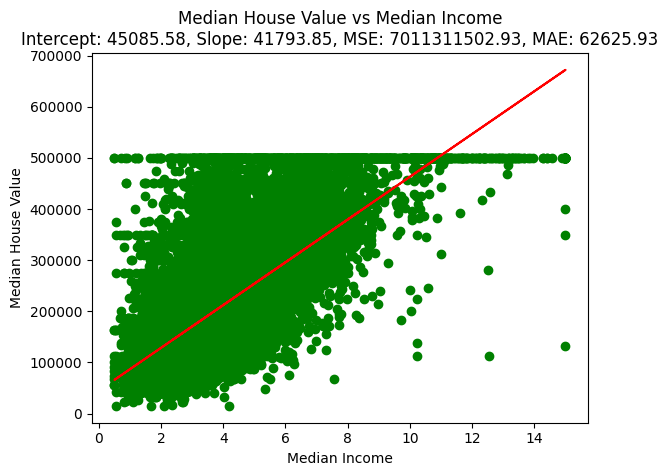

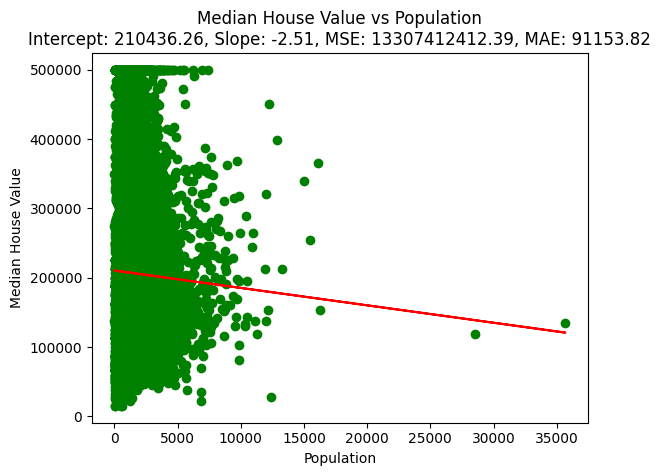

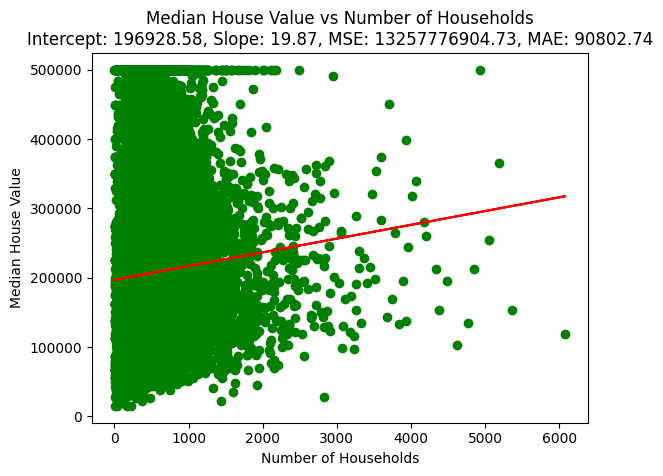

In [23]:

def regression_line(X, y, intercept, slope, mse, mae, title, xlabel):
    plt.scatter(X, y, color='green')
    plt.plot(X, intercept + slope * X, color='red') # Plot the regression line
    plt.title(f'{title}\nIntercept: {intercept:.2f}, Slope: {slope:.2f}, MSE: {mse:.2f}, MAE: {mae:.2f}')
    plt.xlabel(xlabel)
    plt.ylabel('Median House Value')
    plt.show()

# Plot for Median House Value vs Income
regression_line(housing['median_income'], y, income_results[0], income_results[1], income_results[2], income_results[3], 
                     'Median House Value vs Median Income', 'Median Income')

# Plot for Median House Value vs Population
regression_line(housing['population'], y, population_results[0], population_results[1], population_results[2], population_results[3], 
                     'Median House Value vs Population', 'Population')

# Plot for Median House Value vs Number of Households
regression_line(housing['households'], y, households_results[0], households_results[1], households_results[2], households_results[3], 
                     'Median House Value vs Number of Households', 'Number of Households')


## Summary of Analysis

## Key Findings from the Models:
#### Median Income vs. Median House Value:

* Slope: 41,793.85
* Intercept: 45,085.58
* MSE: 70,113,115,02.93
* MAE: 62,625.93

This relationship shows a clear positive trend between median income and house prices. As the median income of a district increases, the median house value rises significantly. The high slope indicates that median income is a strong predictor of housing prices. However, there is still some spread of data points, which means other factors also influence housing prices.


#### Population vs. Median House Value:

* Slope: -2.51
* Intercept: 210,436.26
* MSE: 13,307,412,412.39
* MAE: 91,153.82

Surprisingly, population seems to have a weak negative correlation with house prices, meaning that an increase in population does not significantly raise housing values. The negative slope shows a slight downward trend, and the spread of data points suggests that population alone is not a significant factor in determining house prices.

#### Number of Households vs. Median House Value:

* Slope: 19.87
* Intercept: 196,928.58
* MSE: 13,257,776,904.73
* MAE: 90,802.74

The number of households shows a weak positive correlation with house prices. While the positive slope indicates that more households slightly increase housing prices, the effect is not as strong as income, and the overall predictive power of this feature is relatively low.




## Conclusion

Our analysis leads us to these findings:
- **Median Income** stands out as the best predictor of median house value. It shows a clear linear relationship and has lower error measurements.
- **Population** and **Number of Households** don't predict as well. They have higher error values, and their connections to median house value aren't as straightforward.

So when we want to guess housing prices in this dataset later on, **median income** gives us the most trustworthy information out of these three factors we looked at.
